In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
# import dataset

df = pd.read_csv('/content/data berlabel.csv')
df.head()

,date,id,text,username,like_count,displayname,lang,sentimen,year
0,2021-12-31 23:33:04+00:00,1477060265057214466,"Indonesia punya stok \nVaksin covid 19, 3 bula...",ahimcakep,1,ahimcakep ð®ð©,in,netral,2021
1,2021-12-31 23:28:02+00:00,1477059000378163202,Vaksinasi Covid-19 Dosis Keempat Sudah Boleh d...,haluanharian,0,Harian Haluan,in,netral,2021
2,2021-12-31 23:03:37+00:00,1477052854753906688,Dari awal covid 2020-2021-2022. Sukur kagak ke...,Tebobotee1,0,Tebobotee,in,netral,2021
3,2021-12-31 22:57:02+00:00,1477051199438286853,"2021 :\nVaksin covidâï¸\nKB3 bubar, pindah ...",nursetiandi,0,Nur Setiandi,in,netral,2021
4,2021-12-31 22:45:49+00:00,1477048376294207488,"Satu kalimat utk tahun 2021: ""Alhamdulilah mas...",FauziAdri,2,Fauzi Adrianto,in,positif,2021


In [ ]:
col = ['text', 'sentimen']
df = df[col]

df.isnull().sum()

text        0
sentimen    0
dtype: int64

In [ ]:
df = df.dropna()

df.isnull().sum()

text        0
sentimen    0
dtype: int64

In [ ]:
df.columns = ['text', 'sentimen']
df['sentimen_id'] = df['sentimen'].factorize()[0]

df.head()

,text,sentimen,sentimen_id
0,"Indonesia punya stok \nVaksin covid 19, 3 bula...",netral,0
1,Vaksinasi Covid-19 Dosis Keempat Sudah Boleh d...,netral,0
2,Dari awal covid 2020-2021-2022. Sukur kagak ke...,netral,0
3,"2021 :\nVaksin covidâï¸\nKB3 bubar, pindah ...",netral,0
4,"Satu kalimat utk tahun 2021: ""Alhamdulilah mas...",positif,1


In [ ]:
encoded_data, mapping_index = df['sentimen'].factorize()
print(encoded_data)
print(mapping_index)

[0 0 0 ... 2 1 1]
Index(['netral', 'positif', 'negatif'], dtype='object')


<Axes: xlabel='sentimen'>

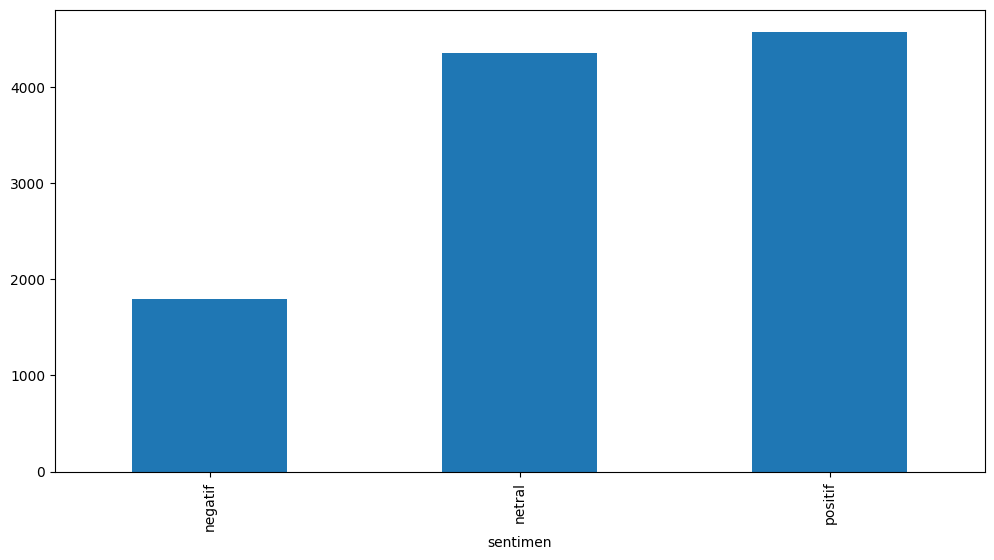

In [ ]:
fig = plt.figure(figsize=(12,6))
df.groupby('sentimen').text.count().plot.bar()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm='l2',
    encoding='latin-1',
    ngram_range=(1,2),
    stop_words='english'
)

features = tfidf.fit_transform(df.text).toarray()
labels = df.sentimen_id

features.shape

(10727, 10153)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(
    df['text'],
    df['sentimen_id'],
    random_state=0
)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
sample1 = df.sample(1)
print(sample1.sentimen)
print(df.text[sample1.index[0]])

5223    netral
Name: sentimen, dtype: object
repot-repot vaksin ben ra keno covid jebul sek keserang malah atine


In [ ]:
pred = clf.predict(count_vect.transform([df.text[sample1.index[0]]]))
print(mapping_index[pred][0])

netral


In [ ]:
sample2 = df.sample(1)
print(sample2.sentimen)
print(df.text[sample2.index[0]])

3036    positif
Name: sentimen, dtype: object
#JanganPergiDulu
Stay safe â¥ï¸ 
Patuhi prokes 5M ð
Ayo vaksin kawan ð 
Libur Nataru menjadi potensi besar untuk penularan Covid-19. 
Yuk merayakan natal dan tahun baru dirumah saja lebih aman dan nyaman... ðâ¥ï¸ðð¹ð®ð© https://t.co/TbzZdtPXtG


In [ ]:
pred = clf.predict(count_vect.transform([df.text[sample2.index[0]]]))
print(mapping_index[pred][0])

positif


In [ ]:
pred = clf.predict(count_vect.transform([df.text[1600]]))

print(mapping_index[pred][0])

positif


Model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

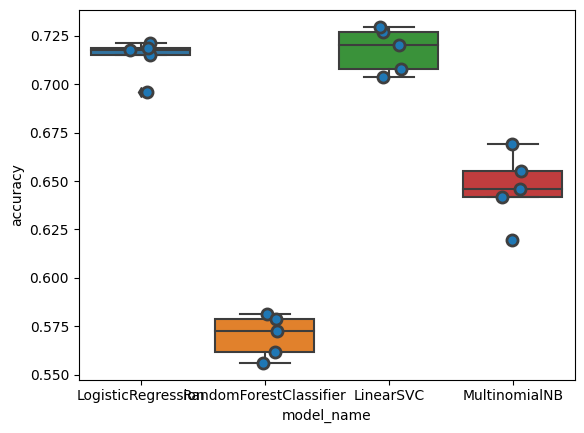

In [ ]:
# find the best model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),
    LinearSVC(),
    MultinomialNB()
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)

    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.717628
LogisticRegression        0.713808
MultinomialNB             0.646313
RandomForestClassifier    0.570149
Name: accuracy, dtype: float64

In [ ]:
# df['department_id'] = df['department'].factorize()[0]
sentimen_id_df = df[['sentimen', 'sentimen_id']].drop_duplicates().sort_values('sentimen_id')
sentimen_to_id = dict(sentimen_id_df.values)
id_to_sentimen = dict(sentimen_id_df[['sentimen_id', 'sentimen']].values)
df.head()

,text,sentimen,sentimen_id
0,"Indonesia punya stok \nVaksin covid 19, 3 bula...",netral,0
1,Vaksinasi Covid-19 Dosis Keempat Sudah Boleh d...,netral,0
2,Dari awal covid 2020-2021-2022. Sukur kagak ke...,netral,0
3,"2021 :\nVaksin covidâï¸\nKB3 bubar, pindah ...",netral,0
4,"Satu kalimat utk tahun 2021: ""Alhamdulilah mas...",positif,1


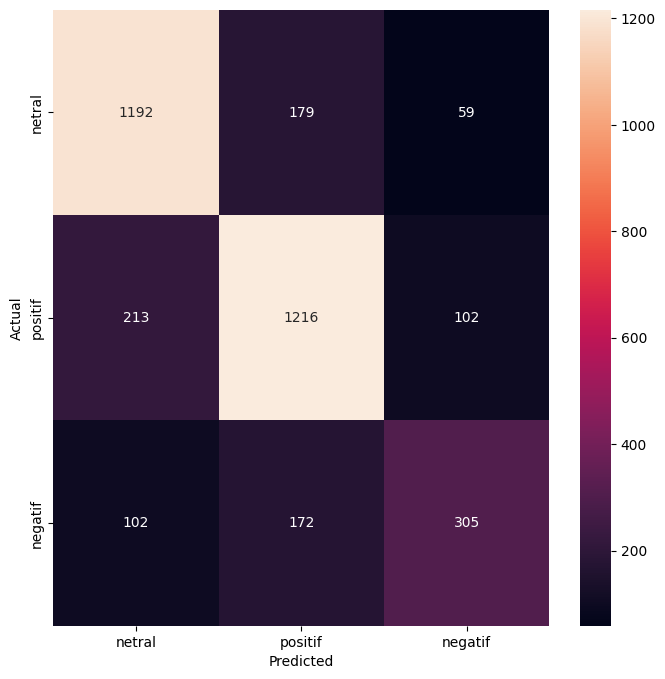

In [ ]:
from sklearn.svm import LinearSVC
import seaborn as sns

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentimen_id_df.sentimen.values, yticklabels=sentimen_id_df.sentimen.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=df['sentimen'].unique()))

              precision    recall  f1-score   support

      netral       0.79      0.83      0.81      1430
     positif       0.78      0.79      0.79      1531
     negatif       0.65      0.53      0.58       579

    accuracy                           0.77      3540
   macro avg       0.74      0.72      0.73      3540
weighted avg       0.76      0.77      0.76      3540

